In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
from pandas import ExcelFile

In [23]:
df = pd.read_excel('GMD Historical Data Tree.xlsx')
df2 = df['Price']
df2 = pd.DataFrame(df2)     
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-07-01,43589,42419,43687,41737,5.09M,0.0395
1,2021-07-02,43443,43882,43882,43394,1.95M,-0.0033
2,2021-07-05,43394,43882,44370,42956,3.67M,-0.0011
3,2021-07-06,40371,43979,43979,40371,2.99M,-0.0697
4,2021-07-07,40859,40761,40957,38519,3.61M,0.0121


In [24]:
# Prediction 3 months into the future.
future_days = 58
df2['Prediction'] = df2['Price'].shift(-future_days)
df2.head()

,Price,Prediction
0,43589,50200.0
1,43443,49000.0
2,43394,47600.0
3,40371,49000.0
4,40859,48650.0


In [25]:
X = np.array(df2.drop(['Prediction'], 1))[:-future_days]
y = np.array(df2['Prediction'])[:-future_days]

C:\Users\DELL\AppData\Local\Temp\ipykernel_20688\2978037697.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df2.drop(['Prediction'], 1))[:-future_days]


In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [27]:
# Implementing Linear and Decision Tree Regression Algorithms.
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [28]:
x_future = df2.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
tree_prediction = tree.predict(x_future)
lr_prediction = lr.predict(x_future)

C:\Users\DELL\AppData\Local\Temp\ipykernel_20688\3447370556.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future = df2.drop(['Prediction'], 1)[:-future_days]


In [29]:
predictions = tree_prediction 
predictions_2 = lr_prediction
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

C:\Users\DELL\AppData\Local\Temp\ipykernel_20688\212474267.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


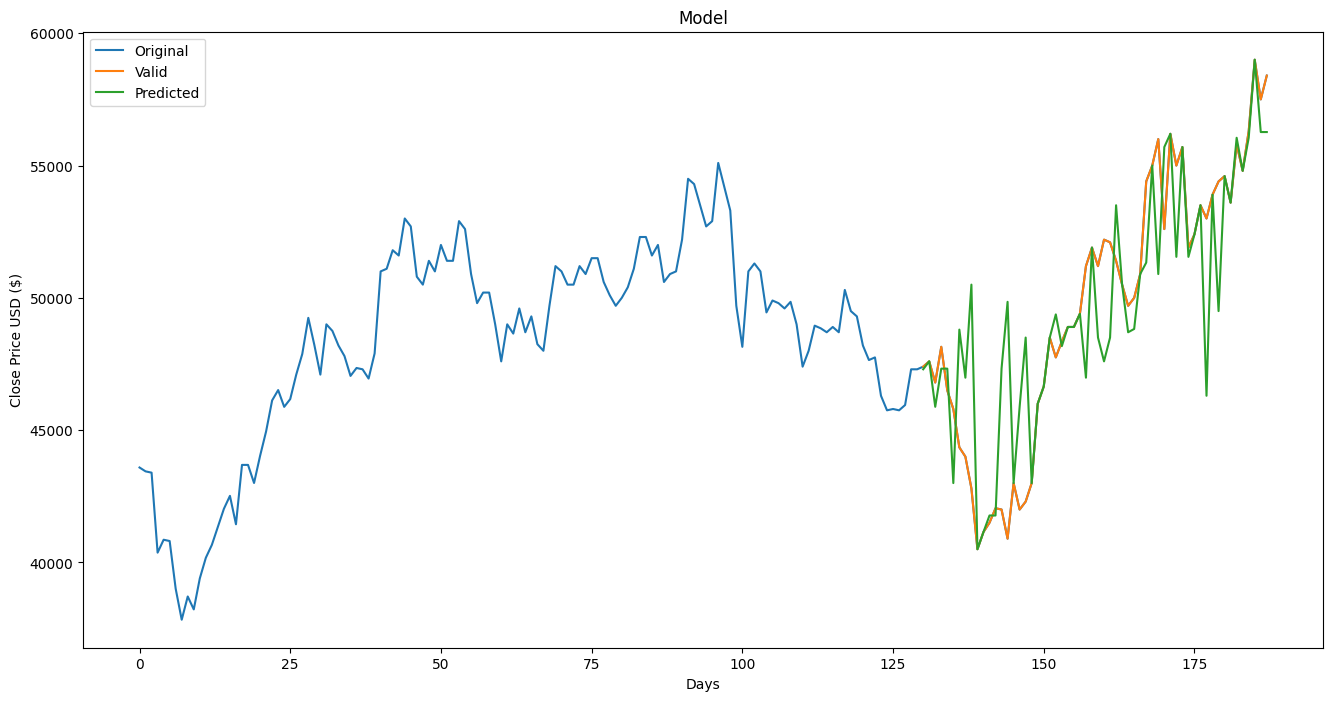

In [30]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2['Price'])
plt.plot(valid[['Price', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()